<div style="font-size: 20px; font-weight: bold">Domain: Cement manufacturing</div>

### Description

The actual concrete compressive strength(MPa) for a given mixture under a specific age(days) was determined
from laboratory. Data is in raw form(not scaled). The data has 8 quantitative input variables,
and 1 quantitative output variable, and 1030 instances(observations). Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

#### Attribute Information

- Cement: measured in kg in a m3 mixture
- Blast: measured in kg in a m3 mixture
- Fly ash : measured in kg in a m3 mixture
- Water : measured in kg in a m3 mixture
- Superplasticizer : measured in kg in a m3 mixture
- Coarse Aggregate : measured in kg in a m3 mixture
- Fine Aggregate : measured in kg in a m3 mixture
- Age : day (1~365)
- Concrete compressive strength measured in MPa

#### Objective

Modeling of strength of high performance concrete using Machine Learning

<hr/>

### Import the necessary libraries

In [862]:
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor


# Setting the plot style. Purely for aesthetic purposes
sns.set_style(style='darkgrid')
warnings.simplefilter('ignore')

#### Load the dataset

In [863]:
data = pd.read_csv('concrete.csv')
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<hr/>

### Deliverable -1 (Exploratory data quality report reflecting the following)

#### Univariate analysis

data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

In [864]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- The dataset is of shape (1030,9)
- There is no sign of missing values in the dataset
- All variables are quantitative input variables -

<table align="left" width="100%">
    <thead>
        <tr>
<!--             <th style="text-align: left" width="10%">Sr</th> -->
            <th style="text-align: left" width="15%">Feature</th>
            <th style="text-align: left" width="15%">Type</th>
            <th style="text-align: left" width="70%">Description</th>
        <tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left" >Cement</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >slag</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Blast measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >ash</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Fly ash measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >water</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Water measured in kg in a m3 mixture</td>
        </tr>
         <tr>
            <td style="text-align: left" >superplastic</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Superplasticizer measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >coarseagg</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Coarse Aggregate measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >fineagg</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Fine Aggregate measured in kg in a m3 mixture</td>
        </tr>
        <tr>
            <td style="text-align: left" >age</td>
            <td style="text-align: left" >Discrete</td>
            <td style="text-align: left" >Age day (1~365)</td>
        </tr>
        <tr>
            <td style="text-align: left" >strength</td>
            <td style="text-align: left" >Continuous</td>
            <td style="text-align: left" >Concrete compressive strength measured in MPa</td>
        </tr>
    </tbody>
</table>

In [865]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


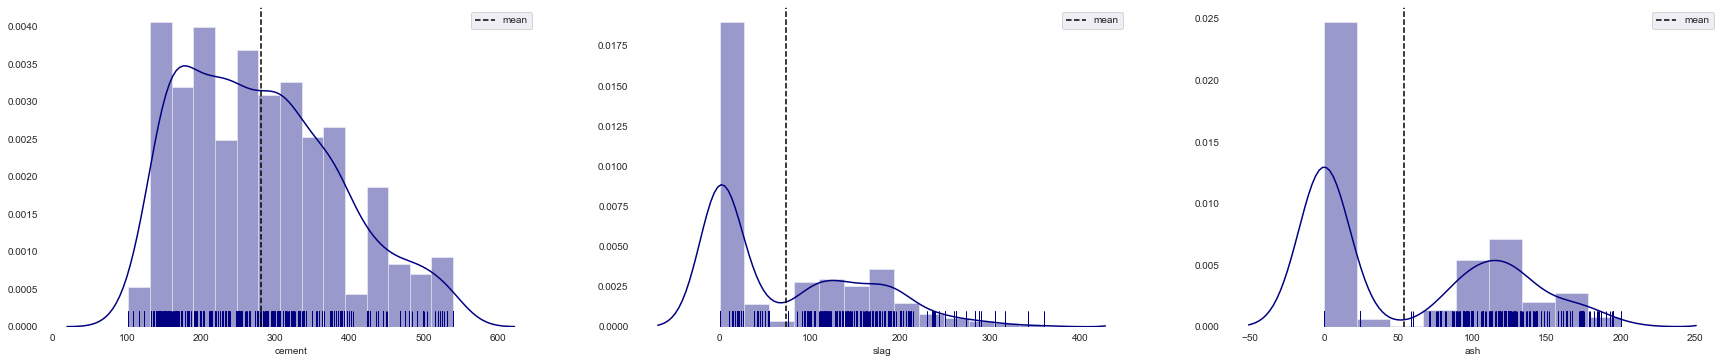

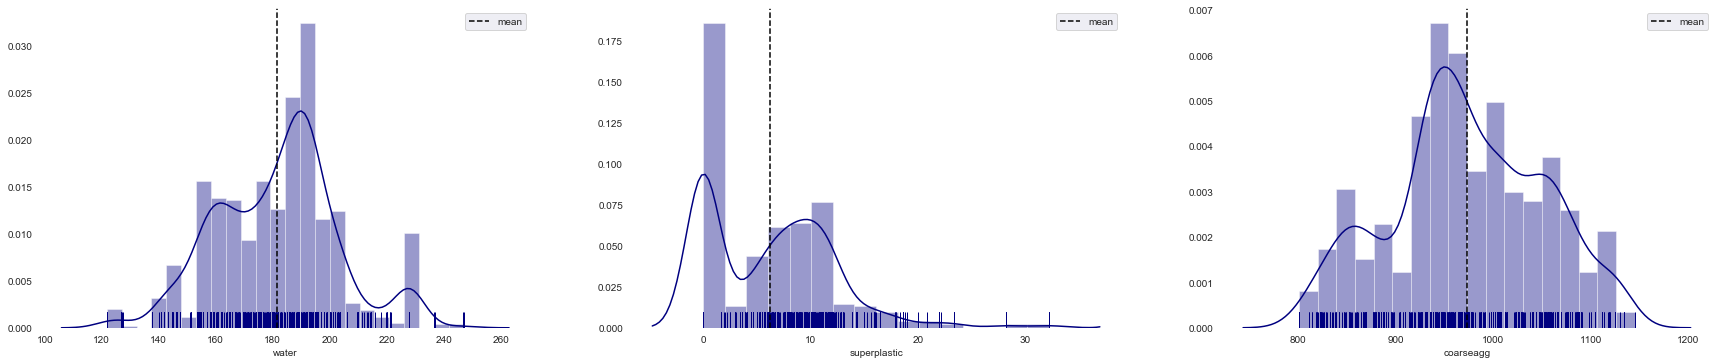

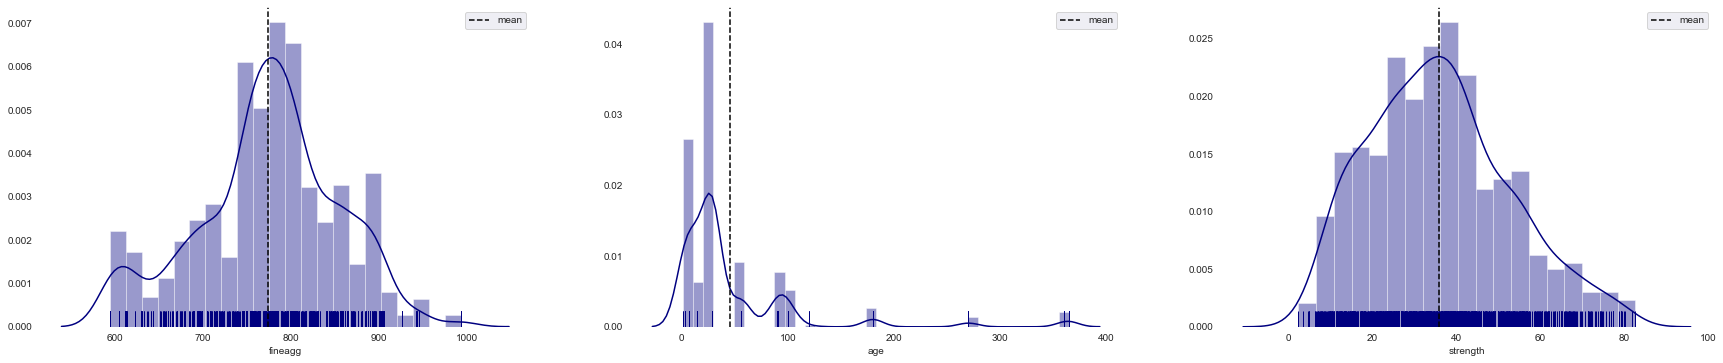

In [866]:
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in data.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if pos == 1:
        plt.figure(figsize=(30, 20))  # Set the figure size

    plt.subplot(3, 3, pos)   # plot grid
    
    ax = sns.distplot(data[feature], kde=True, color='navy', rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[feature].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    # plt.title(i,color="navy")
    # plt.xlabel("")

    pos += 1  # to plot over the grid one by one
    if pos > 3:
        pos = 1

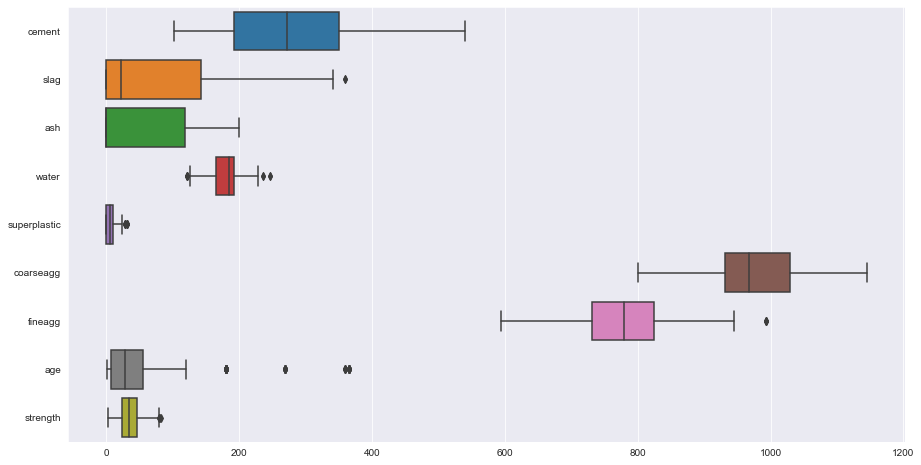

In [867]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, orient='h')

In [868]:
observations = {
    'Cement': '',
    'slag': 'Some extreme values (outliers). There are two peak points. Bi-modal gaussian distributions',
    'ash': 'Here mean is equal to the median. There are two peak points. Bi-modal gaussian distributions',
    'water': 'Some extreme values (outliers). There are three peak points.',
    'superplastic': 'Here mean is equal to the median. Some extreme values (outliers). There are two peak points. Bi-modal gaussian distributions',
    'coarseagg': 'There are two peak points.',
    'fineagg': '',
    'age': 'Some extreme values (outliers). Most of values are between 1 to 25.',
    'strength': ''
}

In [869]:
# skewness = 0 : normally distributed.
# skewness > 0 : more weight in the right tail of the distribution.
# skewness < 0 : more weight in the left tail of the distribution.

for col in data.columns:
    skewness = skew(data[col])
#     peaks, _ = find_peaks(data[col], height=7)
    label = ''
    if skewness == 0:
        label = 'Normally distributed.'
    elif skewness > 0:
        label = 'More weight in the right tail of the distribution (right skewed).' # right skewed
    elif skewness < 0:
        label = 'More weight in the left tail of the distribution. (left skewed).' # left skewed
        
    if col in observations:
        observation_label = observations[col]
    else:
        observation_label = ''
    print(f'\nSkewness of {col} is {skewness}. {label} { observation_label }')


Skewness of cement is 0.5087389156389815. More weight in the right tail of the distribution (right skewed). 

Skewness of slag is 0.7995503309986298. More weight in the right tail of the distribution (right skewed). Some extreme values (outliers). There are two peak points. Bi-modal gaussian distributions

Skewness of ash is 0.5365710347923704. More weight in the right tail of the distribution (right skewed). Here mean is equal to the median. There are two peak points. Bi-modal gaussian distributions

Skewness of water is 0.07451965817729818. More weight in the right tail of the distribution (right skewed). Some extreme values (outliers). There are three peak points.

Skewness of superplastic is 0.9058808712519942. More weight in the right tail of the distribution (right skewed). Here mean is equal to the median. Some extreme values (outliers). There are two peak points. Bi-modal gaussian distributions

Skewness of coarseagg is -0.04016114865669757. More weight in the left tail of the

#### Multivariate analysis

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

##### Bivariate analysis

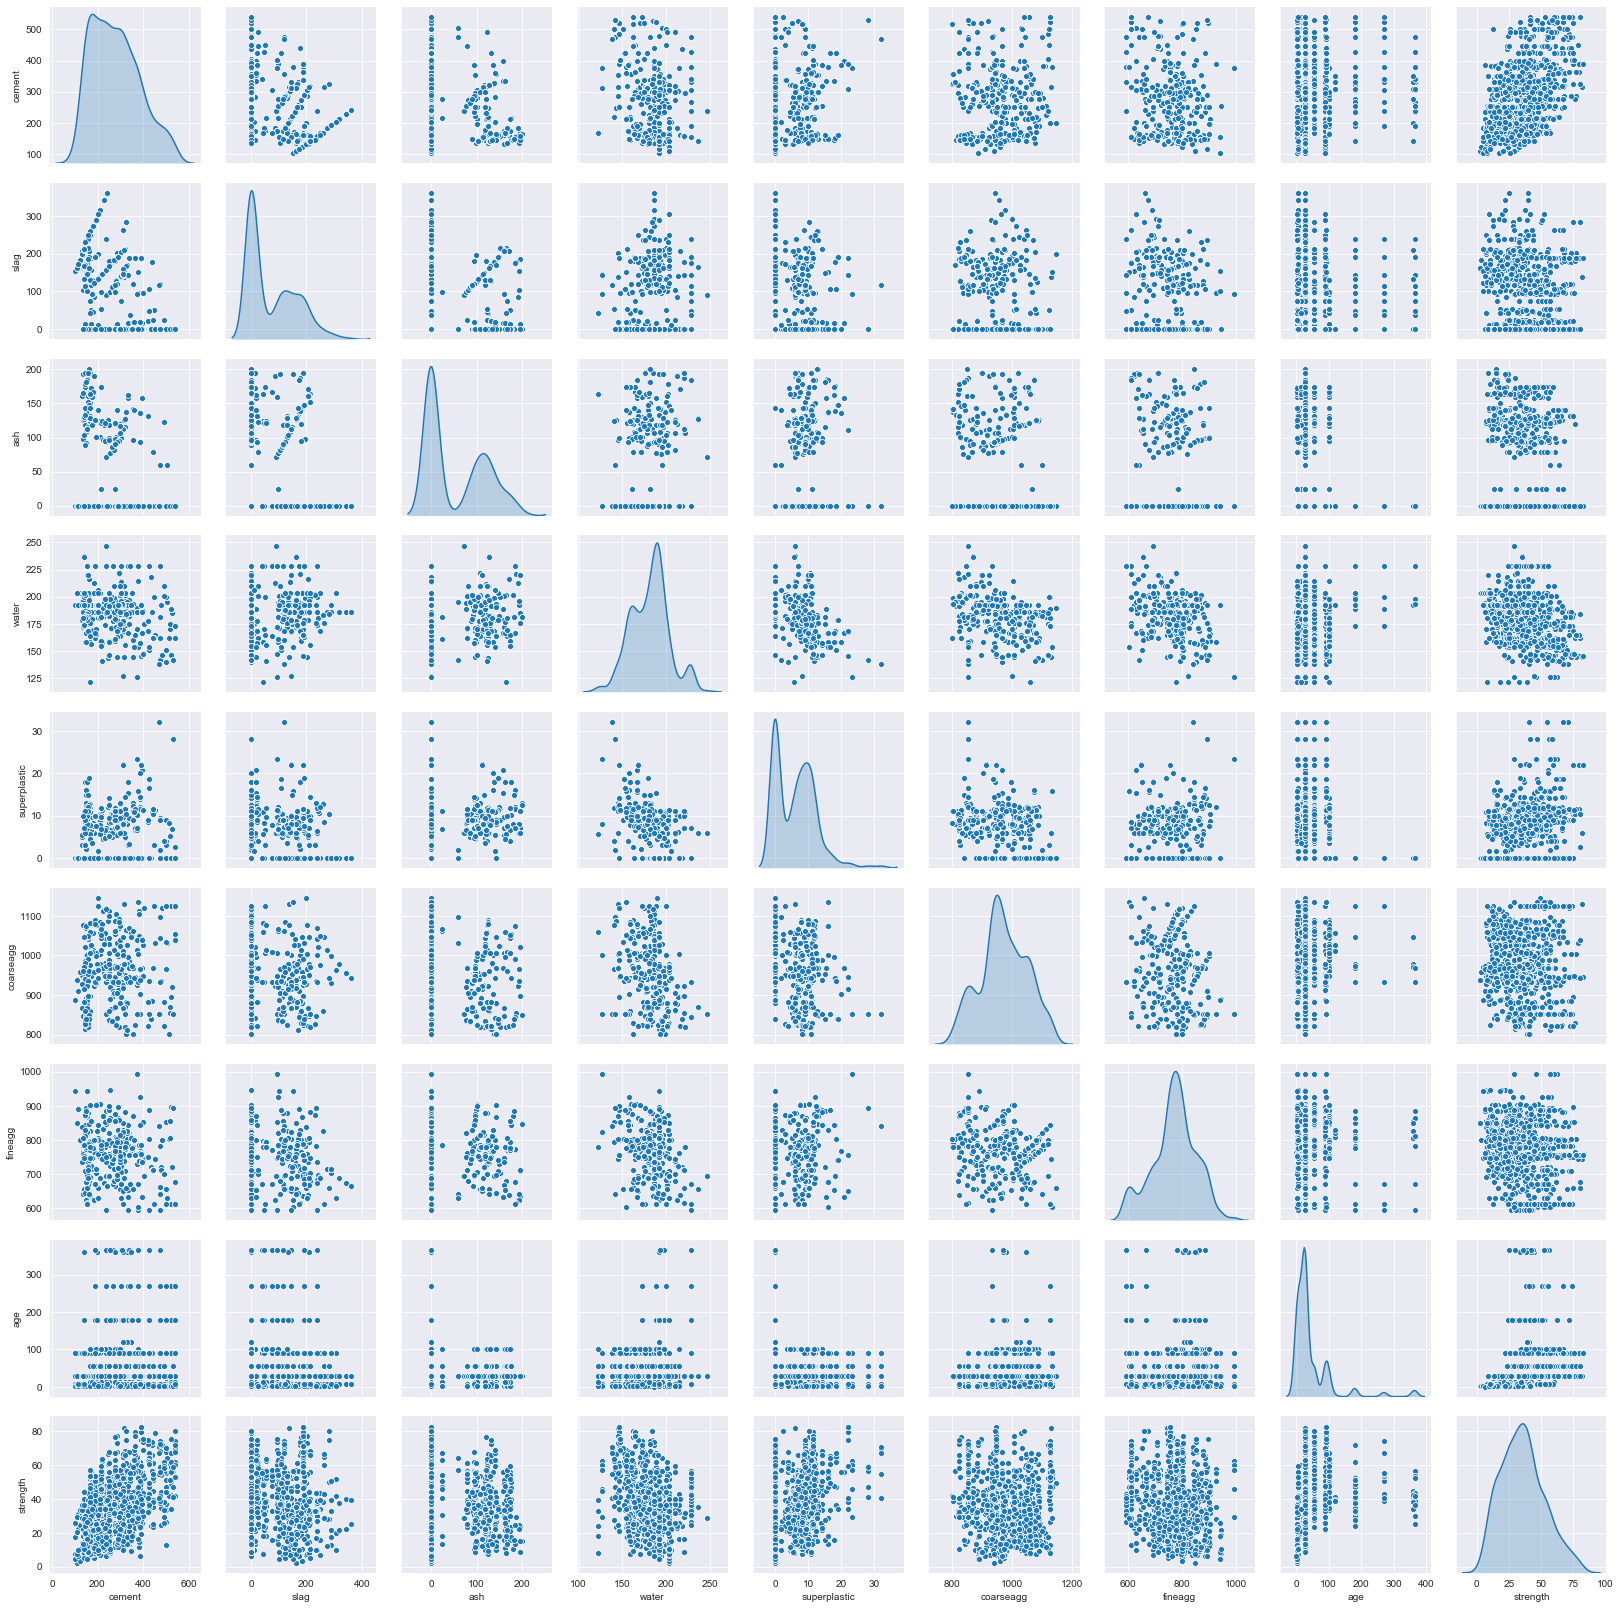

In [870]:
sns.pairplot(data=data, diag_kind='kde')

##### correlation matrix

In [871]:
# Create correlation matrix
corr_matrix = data.corr()

(9.0, 0.0)

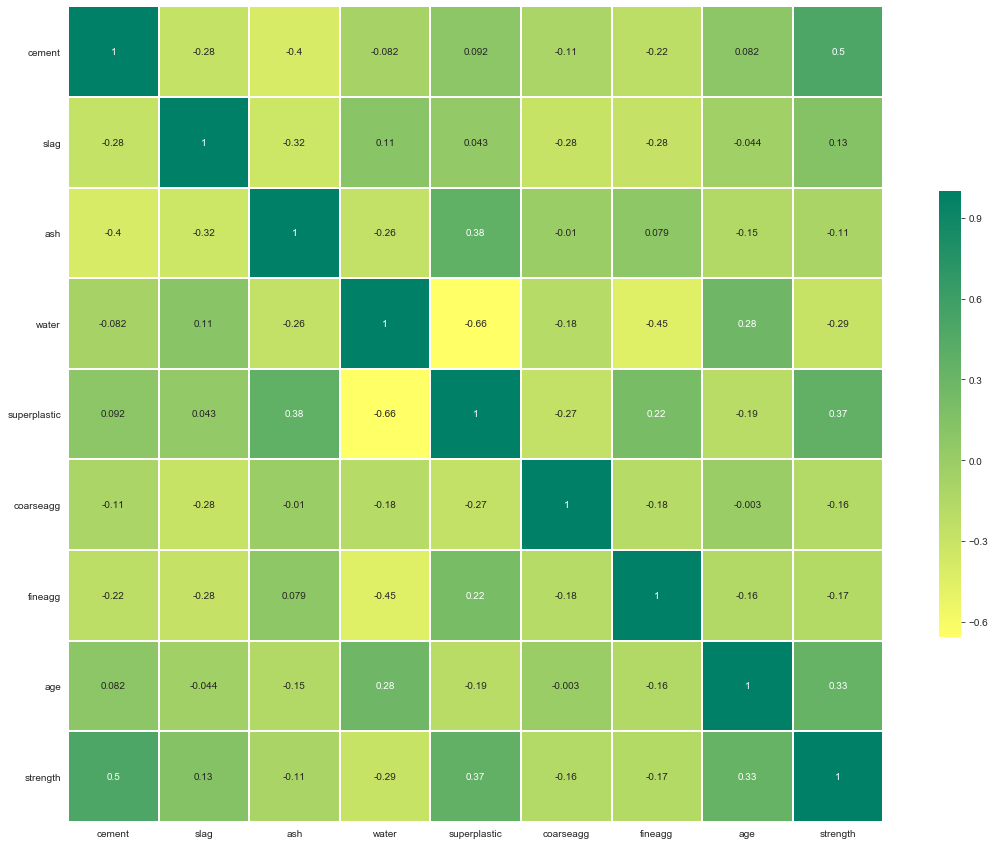

In [872]:
plt.figure(figsize=(20, 15))
sns.set_style(style='white')
g = sns.heatmap(data=corr_matrix, annot=True, cmap='summer_r',
                square=True, linewidth=1, cbar_kws={'fraction': 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

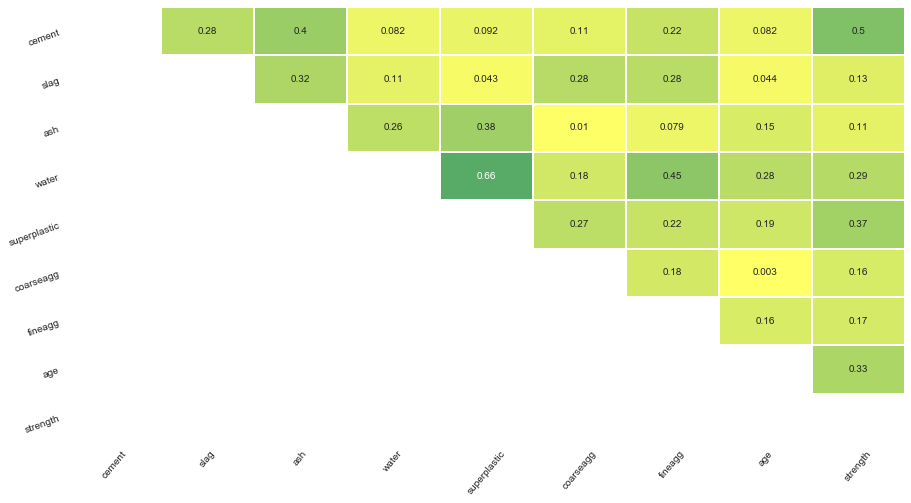

We can drop [] 



In [873]:
# Create correlation matrix
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

mask = upper == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
g = sns.heatmap(upper, center=0.5, cmap= 'summer_r', annot= True, xticklabels = corr_matrix.index, 
                yticklabels = corr_matrix.columns, cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f'We can drop {to_drop} \n')

- Cement, age and superplastic has strong correlation with strength.
- Water and superplastic has strong negative correlation

#### 3D Plot of 2 most important features (Cement and Superplastic) and the target (Strength)

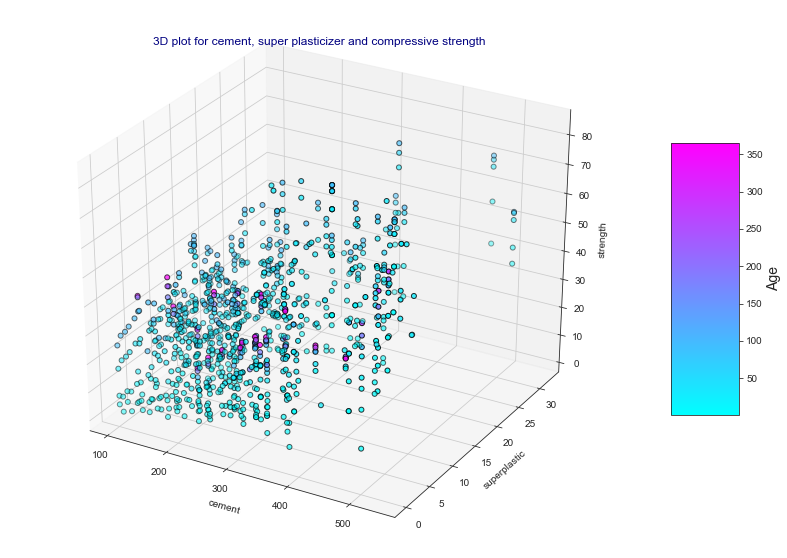

In [874]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))

ax = fig.gca(projection="3d")
#plt.subplot(111,projection = "3d")

plot = ax.scatter(data.cement,
                  data.superplastic,
                  data.strength,
                  linewidth=1, edgecolor="k",
                  c=data.age,
                  s=25,
                  cmap="cool" )

ax.set_xlabel("cement")
ax.set_ylabel("superplastic")
ax.set_zlabel("strength")

lab = fig.colorbar(plot, shrink=.5, aspect=4)
lab.set_label("Age", fontsize=14)

plt.title(
    "3D plot for cement, super plasticizer and compressive strength", color="navy")
plt.show()

#### Correlation with the target

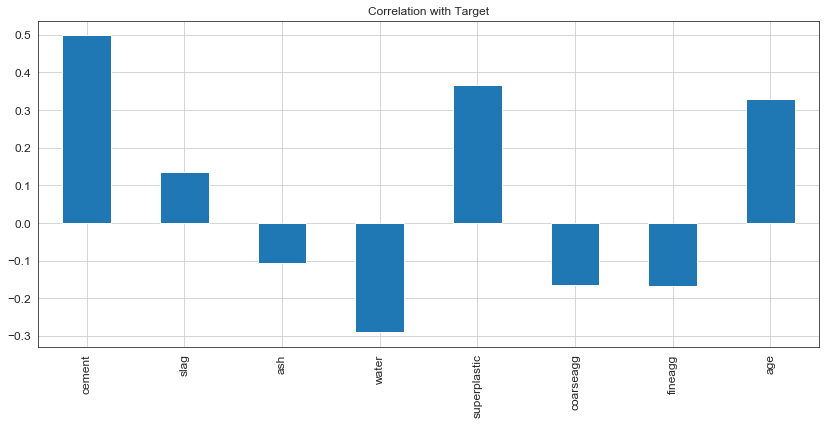

In [875]:
# Correlation with Target
predictors = data.drop('strength', axis=1)
predictors.corrwith(data['strength']).plot.bar(
    figsize=(14, 6), title="Correlation with Target", fontsize=12, grid=True)

#### Pick one strategy to address the presence outliers and missing values and perform necessary imputation

Hendling outliers using IQR at the time spliting data into train and test

##### Checking missing values

In [876]:
def missing_check(df):

    # total number of null values
    total = df.isnull().sum().sort_values(ascending=False)

    # percentage of values that are null
    percent = (df.isnull().sum()/df.isnull().count()
               ).sort_values(ascending=False)

    # putting the above two together
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    # return the dataframe
    return missing_data


missing_check(data).T

,strength,age,fineagg,coarseagg,superplastic,water,ash,slag,cement
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no sign of missing value in the dataset

<hr/>

### Deliverable - 2 (Feature Engineering techniques)

#### Identify opportunities (if any) to create a composite feature, drop a feature etc.

In [877]:
# Binning days to months
def label(data):
    if data["age"] <= 30:
        return "1"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11"
    if data["age"] > 330 :
        return "12"

data["age_months"] = data.apply(lambda data:label(data) , axis=1)

Age distribution in months

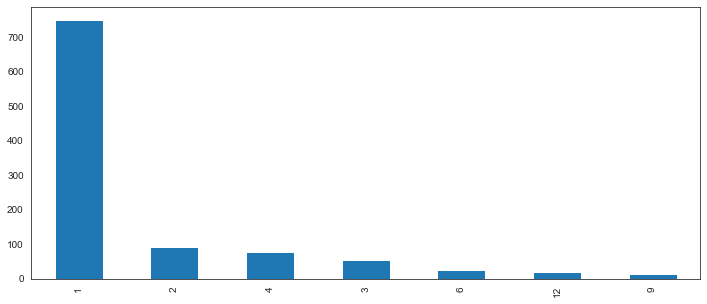

In [878]:
plt.figure(figsize=(12,5))
data.age_months.value_counts().plot(kind="bar")

#### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [879]:
X = data.drop(['strength', 'age_months'], axis=1);
y = data.strength

In [880]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.30)

# for i in X_train.columns:
#     q1, q2, q3 = X_train[i].quantile([0.25,0.5,0.75])
#     IQR = q3 - q1
#     a = X_train[i] > q3 + 1.5*IQR
#     b = X_train[i] < q1 - 1.5*IQR
#     X_train[i] = np.where(a | b, q2, X_train[i])

In [881]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [882]:
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1


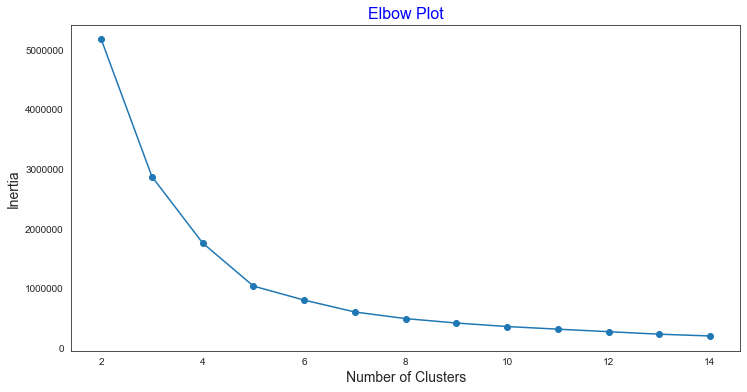

In [883]:
# plt.figure(figsize= (30,20))
# # from sklearn.mixture import GMM
# from sklearn.mixture import GaussianMixture as GMM

# gmm = GMM(n_components=2, random_state=1).fit(X)
# labels = gmm.predict(X)
# plt.scatter(X.values[:, 0], y, c=labels, s=40, cmap='viridis');

# ----------------------------

from sklearn.cluster import KMeans

# data = data[[ 'cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength' ]]

# Create a copy of the data
data_copy = data.copy(deep=True)
tmp_df = data_copy[['ash', 'superplastic', 'slag']]

cluster_range = range( 2, 15 ) 
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(tmp_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append( clusters.inertia_ )
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );
plt.title('Elbow Plot', fontsize = 16, color = 'b')
plt.ylabel('Inertia', fontsize = 14)
plt.xlabel('Number of Clusters', fontsize = 14)
plt.show()

In [884]:
from scipy.stats import zscore

tmp_df_z = tmp_df.apply(zscore)

cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(tmp_df_z)

prediction=cluster.predict(tmp_df_z)
data_copy["group"] = prediction

In [885]:
data_copy.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'age_months', 'group'],
      dtype='object')

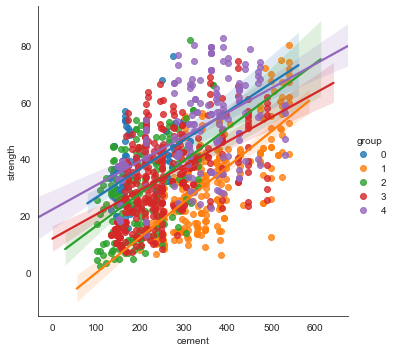

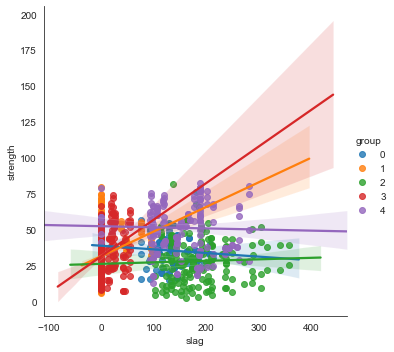

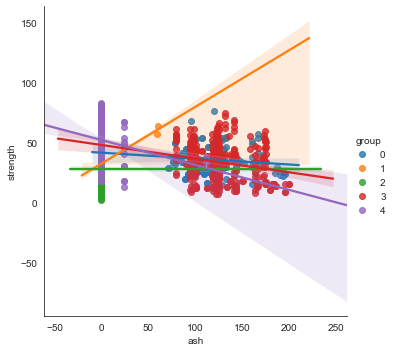

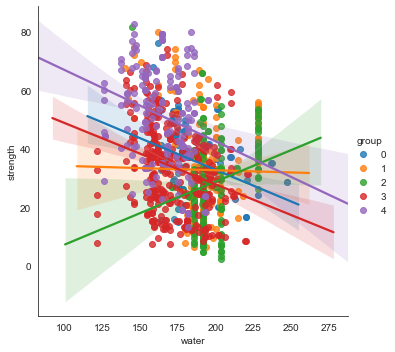

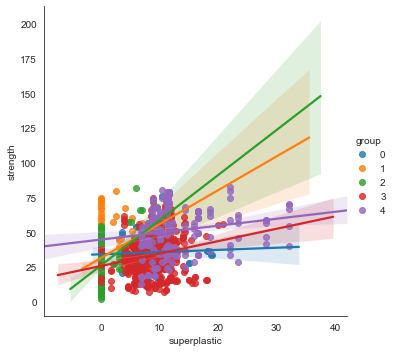

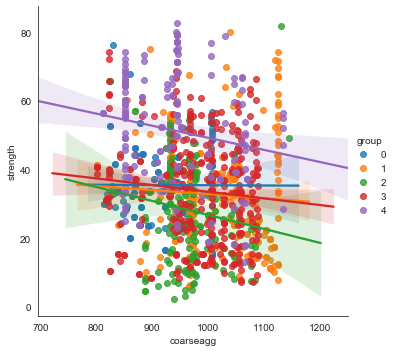

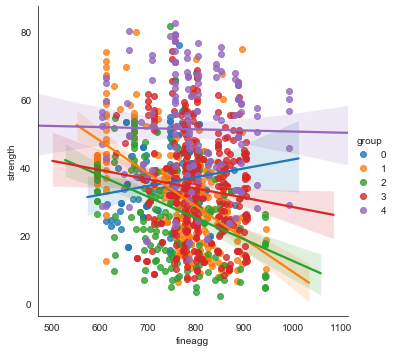

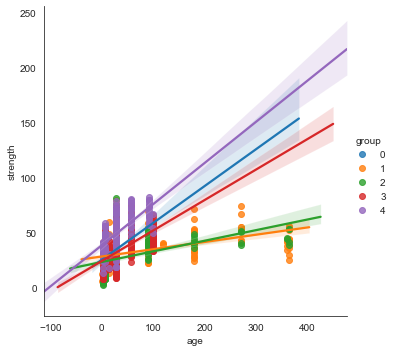

In [886]:
for col in data_copy.columns[:-3]:
    sns.lmplot(data=data_copy, x=col, y='strength', hue='group')

### Deliverable -3 (create the model )

#### Obtain feature importance for the individual features and present your findings

In [887]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    
    # fit the model with the train data
    model.fit(X_train, y_train)   

    # Predict the response for test dataset
    y_predict = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_predict))
    r2   = r2_score(y_test, y_predict)
    

    rmse_cross_val = cross_val_score(model,X_train,y_train,cv=10,scoring="neg_mean_squared_error")
    r2_cross_val = cross_val_score(model,X_train,y_train,cv=10,scoring="r2")
    mean = r2_cross_val.mean()
    std  =  r2_cross_val.std()
    confidence_intervals = str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
    
    return model, rmse, r2, rmse_cross_val, r2_cross_val, y_predict, confidence_intervals

In [888]:
# Linear Regression
lr = LinearRegression()
lr_model, lr_rmse, lr_r2, lr_rmse_cross_val, lr_r2_cross_val, lr_y_predicted, lr_ci = fit_n_print(
    lr, X_train, X_test, y_train, y_test)

# Lasso Regression
lasso = Lasso()
lasso_model, lasso_rmse, lasso_r2, lasso_rmse_cross_val, lasso_r2_cross_val, lasso_y_predicted, lasso_ci = fit_n_print(
    lasso, X_train, X_test, y_train, y_test)

# Ridge Regression
ridge = Ridge()
ridge_model, ridge_rmse, ridge_r2, ridge_rmse_cross_val, ridge_r2_cross_val, ridge_y_predicted, ridge_ci = fit_n_print(
    ridge, X_train, X_test, y_train, y_test)

In [889]:
result1 = pd.DataFrame(
    {
        'Model': ['LinearRegression', 'Lasso Regression ', "Ridge Regression"],
        'RMSE': [lr_rmse,  lasso_rmse,  ridge_rmse],
        'R2': [lr_r2,  lasso_r2,  ridge_r2],
        'RMSE cv-mean': [lr_rmse_cross_val.mean(), lasso_rmse_cross_val.mean(), ridge_rmse_cross_val.mean()],
        'RMSE cv-std': [lr_rmse_cross_val.std(), lasso_rmse_cross_val.std(), ridge_rmse_cross_val.std()],
        'R2 cv-mean': [lr_r2_cross_val.mean(), lasso_r2_cross_val.mean(), ridge_r2_cross_val.mean()],
        'R2 cv-std': [lr_r2_cross_val.std(), lasso_r2_cross_val.std(), ridge_r2_cross_val.std()],
        '95% confidence intervals': [lr_ci, lasso_ci, ridge_ci]
    })

result1.sort_values(by=['RMSE', 'R2'], axis=0, ascending=True,
                    inplace=False, kind='quicksort', na_position='last')

,Model,RMSE,R2,RMSE cv-mean,RMSE cv-std,R2 cv-mean,R2 cv-std,95% confidence intervals
2,Ridge Regression,10.274651,0.637271,-112.269538,20.486531,0.585012,0.071673,0.445 <-> 0.725
0,LinearRegression,10.280622,0.636849,-112.285160,20.607214,0.584901,0.072526,0.443 <-> 0.727
1,Lasso Regression,11.249520,0.565174,-123.221099,19.815620,0.545327,0.058521,0.431 <-> 0.66


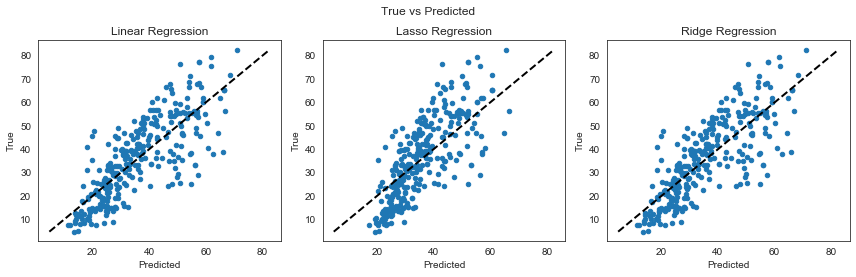

In [890]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 
ax1.scatter(lr_y_predicted, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("Linear Regression") 
ax2.scatter(lasso_y_predicted, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("Lasso Regression") 
ax3.scatter(ridge_y_predicted, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("Ridge Regression") 
fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

There is not much difference between the performance with these three algorithms, we can plot the coefficients assigned by the three algorithms for the features with the following code.

<Figure size 2160x1440 with 0 Axes>

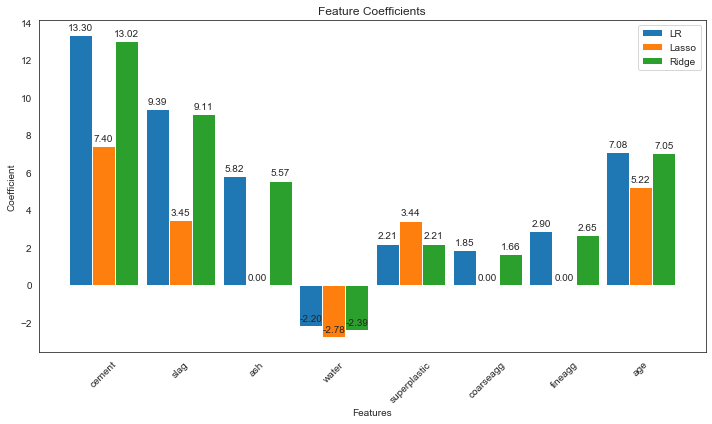

In [891]:
plt.figure(figsize= (30,20))
coeff_lr = lr_model.coef_
coeff_lasso = lasso_model.coef_
coeff_ridge = ridge_model.coef_
labels = X.columns
x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')
ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2,
                                                 height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

Will use the Decision Tree Regressor 

In [892]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

dtr = DecisionTreeRegressor()
dtr_model, dtr_rmse, dtr_r2, dtr_rmse_cross_val, dtr_r2_cross_val, dtr_y_predicted, drt_ci = fit_n_print(
    dtr, X_train, X_test, y_train, y_test)

rfr = RandomForestRegressor(random_state=1, max_depth=4) 
rfr_model, rfr_rmse, rfr_r2, rfr_rmse_cross_val, rfr_r2_cross_val, rfr_y_predicted, rfr_ci = fit_n_print(
    rfr, X_train, X_test, y_train, y_test)

gbr = GradientBoostingRegressor()
gbr_model, gbr_rmse, gbr_r2, gbr_rmse_cross_val, gbr_r2_cross_val, gbr_y_predicted, gbr_ci = fit_n_print(
    gbr, X_train, X_test, y_train, y_test)


In [893]:
result2 = pd.DataFrame(
    {
        'Model': ['DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor'],
        'RMSE': [dtr_rmse, rfr_rmse, gbr_rmse],
        'R2': [dtr_r2, rfr_r2, gbr_r2],
        'RMSE cv-mean': [dtr_rmse_cross_val.mean(), rfr_rmse_cross_val.mean(), gbr_rmse_cross_val.mean()],
        'RMSE cv-std': [dtr_rmse_cross_val.std(), rfr_rmse_cross_val.std(), gbr_rmse_cross_val.std()],
        'R2 cv-mean': [dtr_r2_cross_val.mean(), rfr_r2_cross_val.mean(), gbr_r2_cross_val.mean()],
        'R2 cv-std': [dtr_r2_cross_val.std(), rfr_r2_cross_val.std(), gbr_r2_cross_val.std()],
        '95% confidence intervals': [drt_ci, rfr_ci, gbr_ci]
    })

result2.sort_values(by=['RMSE', 'R2'], axis=0, ascending=True,
                    inplace=False, kind='quicksort', na_position='last')

,Model,RMSE,R2,RMSE cv-mean,RMSE cv-std,R2 cv-mean,R2 cv-std,95% confidence intervals
2,GradientBoostingRegressor,6.268014,0.865008,-27.561065,5.828437,0.897836,0.021848,0.855 <-> 0.941
1,RandomForestRegressor,8.481071,0.752856,-62.117279,11.760298,0.769471,0.046622,0.678 <-> 0.861
0,DecisionTreeRegressor,8.773258,0.735534,-52.581676,11.793793,0.798368,0.057355,0.686 <-> 0.911


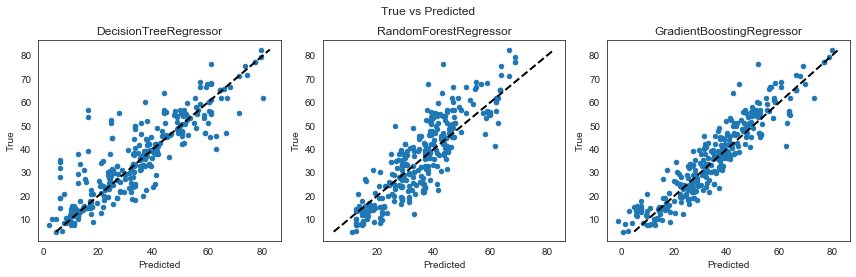

In [894]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 

ax1.scatter(dtr_y_predicted, y_test, s=20) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True") 
ax1.set_xlabel("Predicted") 
ax1.set_title("DecisionTreeRegressor") 

ax2.scatter(rfr_y_predicted, y_test, s=20) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True") 
ax2.set_xlabel("Predicted") 
ax2.set_title("RandomForestRegressor") 

ax3.scatter(gbr_y_predicted, y_test, s=20) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True") 
ax3.set_xlabel("Predicted") 
ax3.set_title("GradientBoostingRegressor") 

fig.suptitle("True vs Predicted") 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

We can plot the feature importance’s for tree-based models. The feature importance’s show how important a feature is for a model when making a prediction.

<Figure size 2160x1440 with 0 Axes>

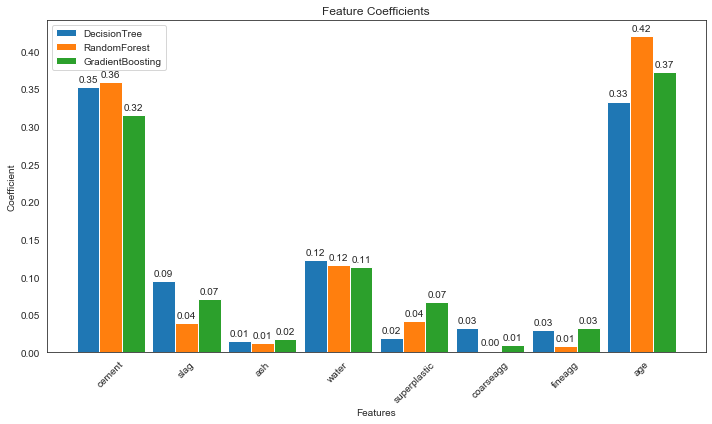

In [895]:
plt.figure(figsize= (30,20))
coeff_dtr = dtr_model.feature_importances_
coeff_rfr = rfr_model.feature_importances_
coeff_gbr = gbr_model.feature_importances_
labels = X.columns

x = np.arange(len(labels))
width = 0.3
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 2*(width/2), coeff_dtr, width, label='DecisionTree')
rects2 = ax.bar(x, coeff_rfr, width, label='RandomForest')
rects3 = ax.bar(x + 2*(width/2), coeff_gbr, width, label='GradientBoosting')
ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2,
                                                 height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()

### Deliverable - 4 (Tuning the model)

#### Algorithms that you think will be suitable for this project

In [896]:
all_models = pd.concat([result1, result2])
all_models.sort_values(by=['RMSE', 'R2'], axis=0, ascending=True, kind='quicksort')

,Model,RMSE,R2,RMSE cv-mean,RMSE cv-std,R2 cv-mean,R2 cv-std,95% confidence intervals
2,GradientBoostingRegressor,6.268014,0.865008,-27.561065,5.828437,0.897836,0.021848,0.855 <-> 0.941
1,RandomForestRegressor,8.481071,0.752856,-62.117279,11.760298,0.769471,0.046622,0.678 <-> 0.861
0,DecisionTreeRegressor,8.773258,0.735534,-52.581676,11.793793,0.798368,0.057355,0.686 <-> 0.911
2,Ridge Regression,10.274651,0.637271,-112.269538,20.486531,0.585012,0.071673,0.445 <-> 0.725
0,LinearRegression,10.280622,0.636849,-112.285160,20.607214,0.584901,0.072526,0.443 <-> 0.727
1,Lasso Regression,11.249520,0.565174,-123.221099,19.815620,0.545327,0.058521,0.431 <-> 0.66


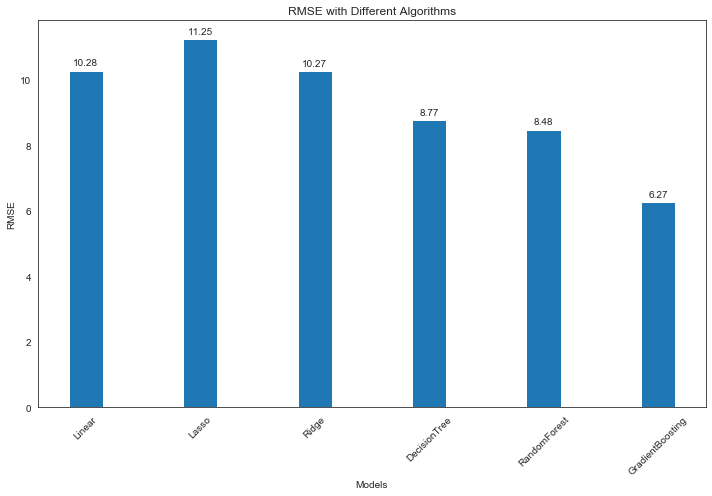

In [897]:
models = [lr_model, lasso_model, ridge_model, dtr_model, rfr_model, gbr_model]
names = ["Linear", "Lasso", "Ridge",
         "DecisionTree", "RandomForest", "GradientBoosting"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
x = np.arange(len(names))
width = 0.3
fig, ax = plt.subplots(figsize=(10, 7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

We have analysed the Compressive Strength Data and used Machine Learning to Predict the Compressive Strength of Concrete. We have used Linear Regression and its variations, Decision Trees, GradientBoosting and Random Forests regressors to make predictions and compared their performance. <b>GradientBoosting Regressor has the lowest RMSE and is a good choice for this problem.</b> Also, we can further improve the performance of the algorithm by tuning the hyperparameters by performing a grid search or random search.

#### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

##### Spliting the data

In [898]:
X = data.drop(['ash', 'coarseagg', 'fineagg', 'strength', 'age_months'], axis=1)
y = data.strength

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 5), (206, 5), (824,), (206,))

##### Randomized Search

In [902]:
# Prepare parameter grid
param_grid = {
    'criterion': ['mse', 'mae'], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2], 
    'max_depth': [3, 4, 5], 
    'max_features': ['sqrt', None], 
    'max_leaf_nodes': list(range(3, 8)),
    'n_estimators': list(range(50, 500, 100))
}   

# Perform hyper parameter tuning using GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_distributions=param_grid, 
                 return_train_score= True, n_jobs=-1, verbose=1, cv = 5)
rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   53.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [903]:
mean = rs.best_score_
std = rs.cv_results_['mean_test_score'].std()

print(f"\nMean training score: {rs.cv_results_['mean_train_score'].mean()}\n")
print(f"Mean validation score: {mean}\n")
print(f"Validation standard deviation: {std}\n")
print(f"Best parameters: {rs.best_params_}\n")
print(f"Test score: {rs.score(X_test, y_test)}\n")


Mean training score: 0.9414478593855586

Mean validation score: 0.9189083511275046

Validation standard deviation: 0.016183417815852662

Best parameters: {'n_estimators': 450, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1, 'criterion': 'mse'}

Test score: 0.9105393622484428



#### Model performance range at 95% confidence level

In [904]:
print(f"95% confidence interval: {str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))}\n")

95% confidence interval: 0.887 <-> 0.951



#### Conclusion

In the above study, we find that in order to predict the strength of concrete

- The features that affect the strength are cement, slag, water, superplastic and age
- The best model is Gradient Boosting Regressor.
- Using the above model, we can predict the strength accurately between 87.7% to 95.1% with 95% confidence.